# Importing Necessary Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Read the Data Set

In [54]:
data = pd.read_excel("EBP.xlsx")

In [55]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [56]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


# General Data Description

In [58]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


# Feature Scaling

In [59]:
data = data.drop('Date of Joining', axis = 1)

In [60]:
data = data.drop('Employee ID', axis = 1)

# Exploratory Data Analysis

In [61]:
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
data['Company Type'] = data['Company Type'].replace({'Product': 0, 'Service': 1})
data['WFH Setup Available'] = data['WFH Setup Available'].replace({'No': 0, 'Yes': 1})



In [62]:
data_1 = data

In [63]:
data_1.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
2,0,0,1,2,NaN,5.8,0.49
3,1,1,1,1,1.0,2.6,0.20
4,0,1,0,3,7.0,6.9,0.52


In [64]:
data_1.isnull().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [65]:
data_nonull = data.dropna()

In [66]:
data_nonull.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
3,1,1,1,1,1.0,2.6,0.20
4,0,1,0,3,7.0,6.9,0.52
5,1,0,1,2,4.0,3.6,0.29


# Correlation

In [67]:
data.corr(numeric_only=True)['Burn Rate'][:]

Gender                  0.154895
Company Type            0.004281
WFH Setup Available    -0.306266
Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Burn Rate               1.000000
Name: Burn Rate, dtype: float64

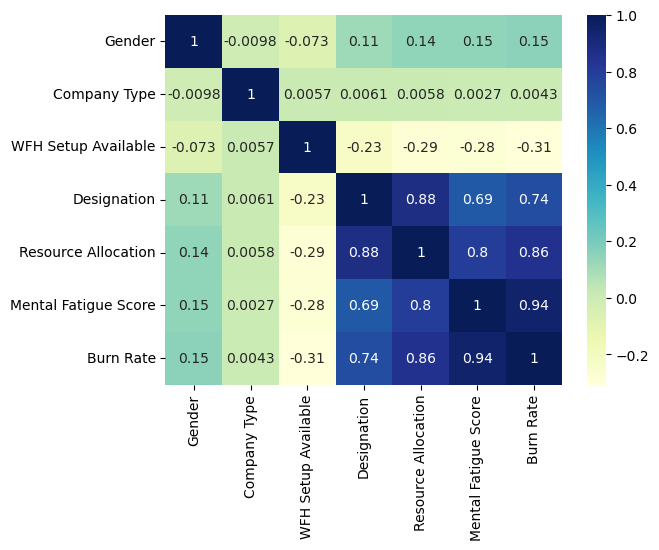

In [68]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

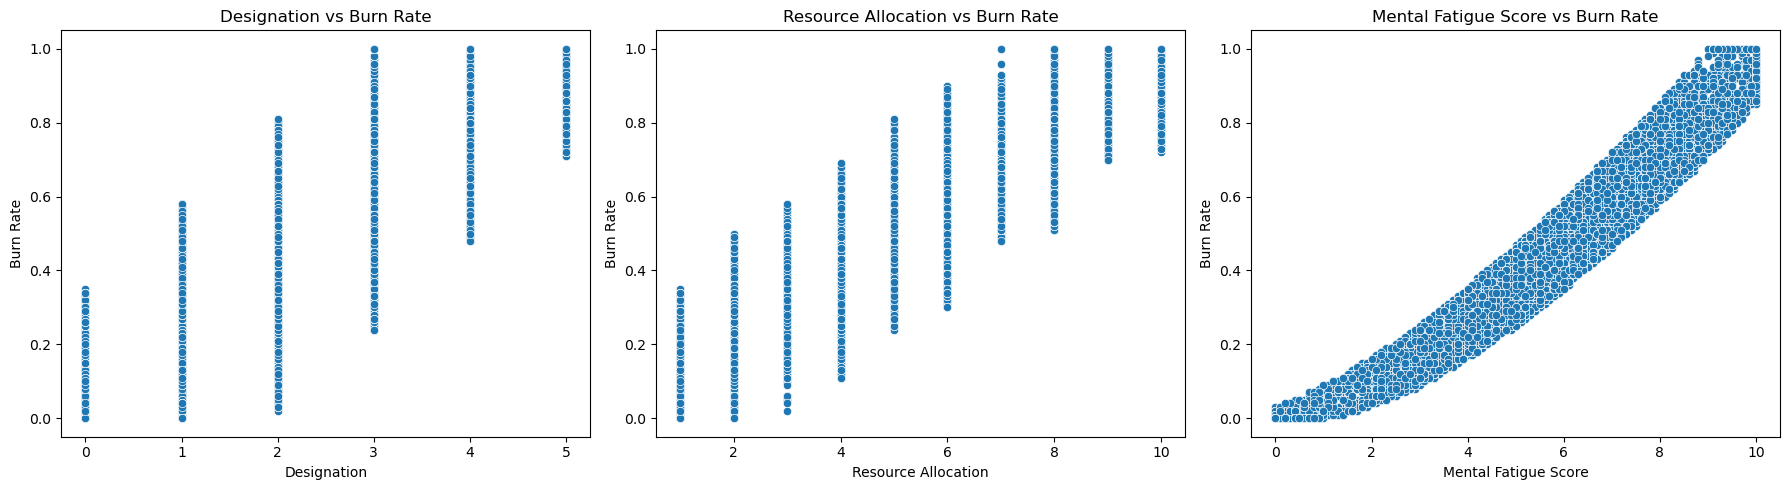

In [69]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Designation', y='Burn Rate', data=data)
plt.title('Designation vs Burn Rate')
plt.xlabel('Designation')
plt.ylabel('Burn Rate')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Resource Allocation', y='Burn Rate', data=data)
plt.title('Resource Allocation vs Burn Rate')
plt.xlabel('Resource Allocation')
plt.ylabel('Burn Rate')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', data=data)
plt.title('Mental Fatigue Score vs Burn Rate')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Burn Rate')
plt.tight_layout()
plt.show()

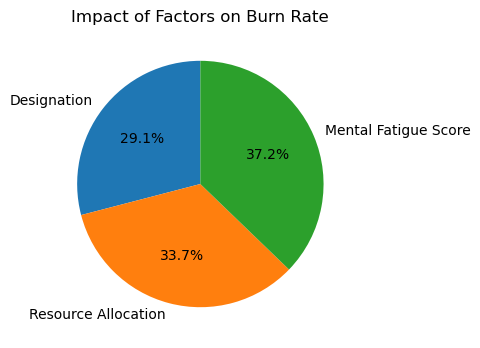

In [70]:
correlations = data[['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].corr()['Burn Rate'][:-1]
labels = correlations.index
sizes  = abs(correlations.values)
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Impact of Factors on Burn Rate')
plt.show()


In [71]:
data.isnull().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [72]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [73]:
# Predicting Missing Values of Burn Rate

In [74]:
br_test_data = data[
    data['Burn Rate'].isnull() & 
    data[['Gender', 'Company Type', 'WFH Setup Available', 'Designation']].notnull().all(axis=1)
][['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Burn Rate']]

columns_to_keep = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Burn Rate']
br_train_data = data_nonull[columns_to_keep]

br_y_train = br_train_data['Burn Rate']

br_x_train = br_train_data.drop("Burn Rate",axis =1)

lr = LinearRegression()

lr.fit(br_x_train, br_y_train)

br_X_test = br_test_data.drop("Burn Rate", axis=1)

br_y_pred = lr.predict(br_X_test)

br_test_data.loc[br_test_data['Burn Rate'].isnull(), 'Burn Rate'] = br_y_pred

data['Burn Rate'] = data['Burn Rate'].fillna(br_test_data['Burn Rate'])


In [89]:
data.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

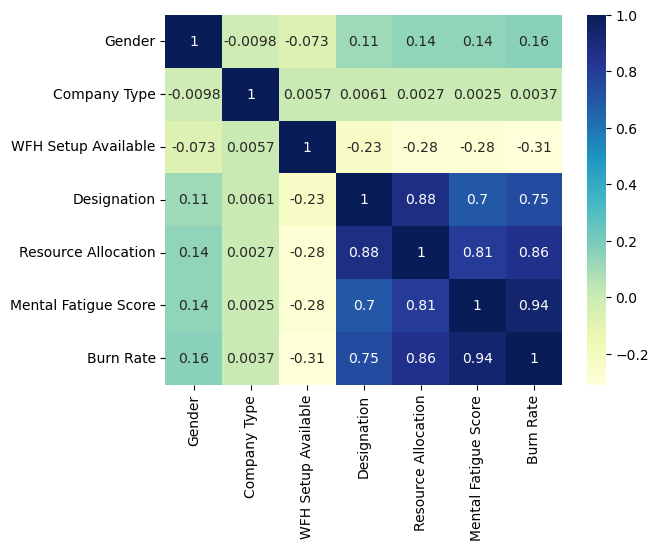

In [90]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

In [76]:
# Predicting Missing values of Resource Allocation

In [77]:
ra_test_data = data[
    data['Resource Allocation'].isnull() & 
    data[['Gender', 'Company Type', 'WFH Setup Available', 'Designation']].notnull().all(axis=1)
][['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation','Burn Rate']]

columns_to_keep = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation','Burn Rate']
ra_train_data = data_nonull[columns_to_keep]

ra_y_train = ra_train_data['Resource Allocation']

ra_x_train = ra_train_data.drop("Resource Allocation",axis =1)

lr = LinearRegression()

lr.fit(ra_x_train, ra_y_train)

ra_X_test = ra_test_data.drop("Resource Allocation", axis=1)

ra_y_pred = lr.predict(ra_X_test)

ra_test_data.loc[ra_test_data['Resource Allocation'].isnull(), 'Resource Allocation'] = ra_y_pred

data['Resource Allocation'] = data['Resource Allocation'].fillna(ra_test_data['Resource Allocation'])


In [93]:
data.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

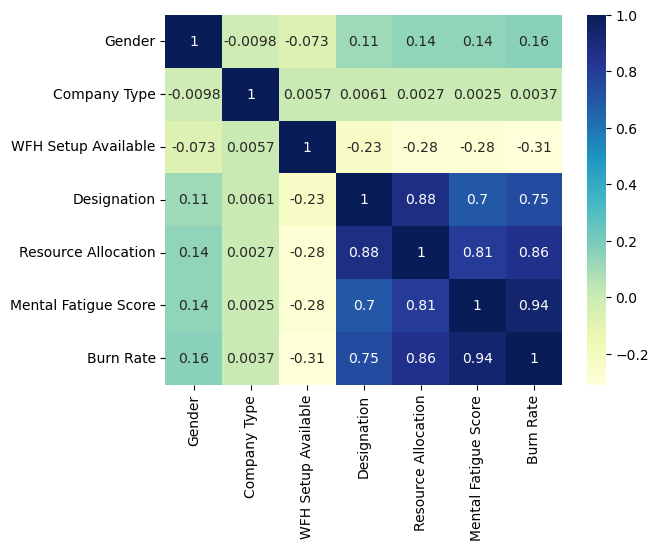

In [94]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

In [79]:
# Predicting Missing Values of Mental Fatigue Score 

In [80]:
mfs_test_data = data[
    data['Mental Fatigue Score'].isnull() & 
    data[['Gender', 'Company Type', 'WFH Setup Available', 'Designation']].notnull().all(axis=1)
][['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Mental Fatigue Score','Resource Allocation','Burn Rate']]

columns_to_keep = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Mental Fatigue Score','Resource Allocation','Burn Rate']
mfs_train_data = data_nonull[columns_to_keep]

mfs_y_train = mfs_train_data['Mental Fatigue Score']

mfs_x_train = mfs_train_data.drop("Mental Fatigue Score",axis =1)

lr = LinearRegression()

lr.fit(mfs_x_train, mfs_y_train)

mfs_X_test = mfs_test_data.drop("Mental Fatigue Score", axis=1)

mfs_y_pred = lr.predict(mfs_X_test)

mfs_test_data.loc[mfs_test_data['Mental Fatigue Score'].isnull(), 'Mental Fatigue Score'] = mfs_y_pred

data['Mental Fatigue Score'] = data['Mental Fatigue Score'].fillna(mfs_test_data['Mental Fatigue Score'])


In [95]:
data.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

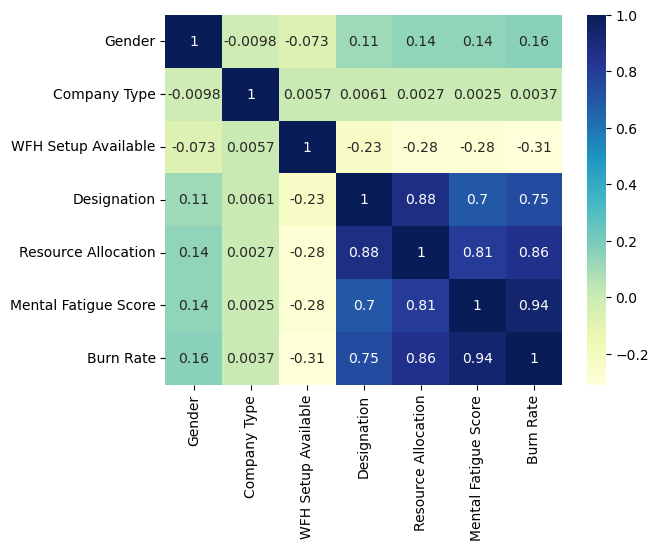

In [96]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

# Model Building

In [111]:
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

lr.fit(X_train, y_train)

prediction = lr.predict(X_test)
print('Linear Regression: ')
r2_score(y_test, prediction)

Linear Regression: 


0.9137622961556624

In [112]:
X.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,0,1,0,2,3.000000,3.8
1,1,1,1,1,2.000000,5.0
2,0,0,1,2,4.430383,5.8
3,1,1,1,1,1.000000,2.6
4,0,1,0,3,7.000000,6.9


# Analytical Evaluation

In [113]:
predictions = lr.predict(X_test)

#calculate mean squared error
mse = mean_squared_error(y_test, predictions)

#calculate root mean square error
rmse = np.sqrt(mse)

#calculate mean absolute error
mae = mean_absolute_error(y_test, predictions)

#calculate R-squared error
r2 = r2_score(y_test, predictions)


print('Linear Regression Model Performance Matrix:\n')

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Linear Regression Model Performance Matrix:

Mean Squared Error: 0.003261986379681735
Root Mean Squared Error: 0.05711380200688565
Mean Absolute Error: 0.04511313565968739
R-squared: 0.9137622961556624


# Predictions

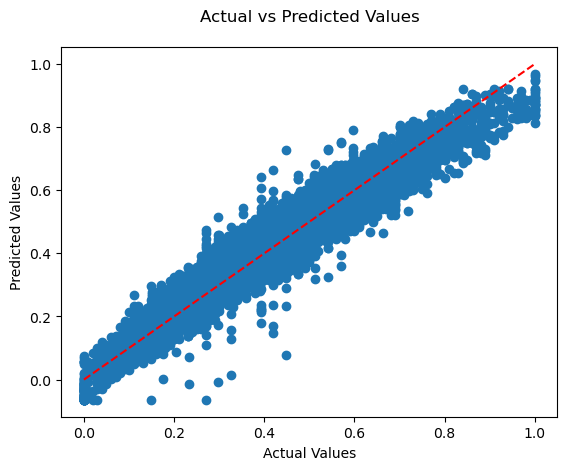

In [114]:
plt.scatter(x=y_test,y=predictions)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r',linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values\n')
plt.show()

# Residuals

In [116]:
residuals = y_test - predictions

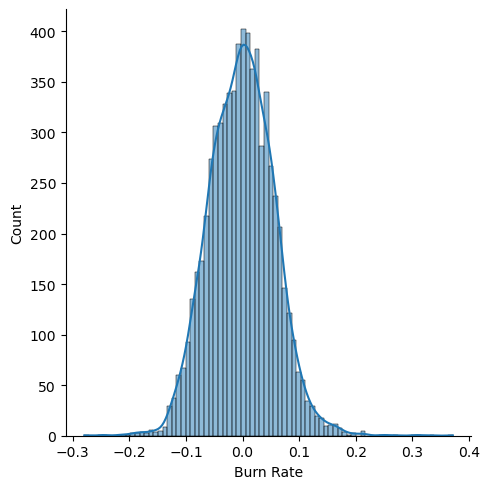

In [117]:
sns.displot(residuals, kde=True)

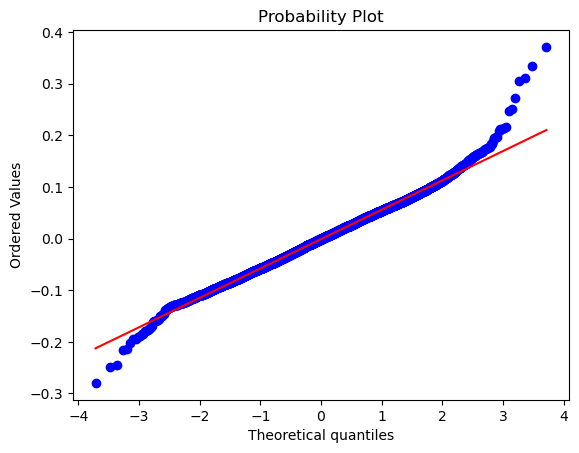

In [118]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

Text(0.5, 1.0, 'Evaluation of our Linear Regression Model\n')

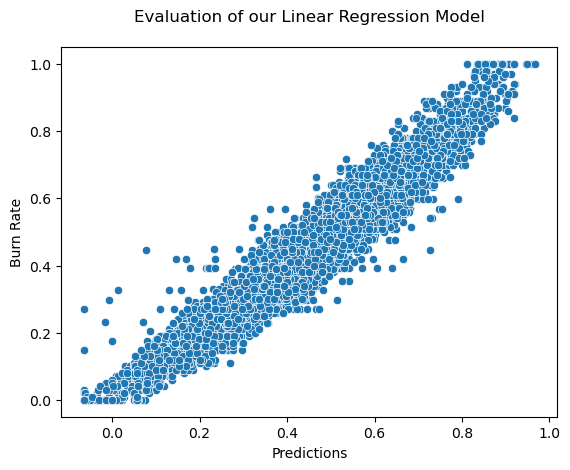

In [119]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our Linear Regression Model\n")